<a href="https://colab.research.google.com/github/YaseminSarpkaya/BIO310-Bioinformatics/blob/main/BIO310_HW4_YaseminSarpkaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yasemin Sarpkaya 29172

## Submission instructions:

*   Upload the code together with your comments in markdown in the form of an .ipynb to SuCourse by the due date. Name your submission BIO310-HW4-NameSurname.ipynb .
*   This is **not** a groups work. Work individually.
*   **Please, read every instruction/description in the homework, and follow each task, including the detailed inspection of the external links.**
*   Please follow the submission instructions, not adhering the submission standards will lead to point deduction.

## Quick Recap:
RNA-Seq is a powerful method used in molecular biology to study gene expression. It is a technique that allows scientists to measure the amount of RNA molecules produced by cells or tissues under different conditions.

To understand RNA-Seq, we first need to know what RNA is. RNA stands for Ribonucleic Acid, and it is a molecule that plays an important role in the process of gene expression. RNA acts as a messenger between DNA (the genetic material of the cell) and proteins (the functional molecules that perform many tasks in the cell).

RNA-Seq works by isolating RNA from cells or tissues and converting it into a complementary DNA (cDNA) library. This cDNA library is then sequenced using high-throughput sequencing technologies, which generate millions of short reads that represent the RNA molecules present in the sample.

Once the reads are generated, bioinformaticians use specialized software to analyze them and map them back to the genome or transcriptome of the organism being studied. This mapping step allows scientists to identify which genes are expressed in the sample and how much RNA is being produced by each gene.

RNA-Seq can provide insights into a variety of biological processes, such as gene regulation, cellular differentiation, and disease states. It has revolutionized the field of molecular biology and is now widely used in research labs around the world.

## Scenario (Exemplary):

We started by obtaining raw sequencing reads in .fastq format from the sequencing facility. Before analyzing the data, we performed Quality Control (QC) checks to ensure the quality of the reads. These checks included assessing the distribution of read lengths, looking for the presence of adapter sequences, and checking for the presence of any low-quality reads.

Once we were satisfied with the quality of the reads, we used software such as STAR to map the reads to a transcriptome. We then used software such as SALMON to quantify the expression levels of each transcript, which gave us the number of reads that mapped to each transcript in the transcriptome, and then we used transcript counts to aggregate to gene level expression.

Now, our data consists of gene level counts for each sample, and we are expected to analyze it.

## We will do the following:

**Firstly**, to get a quick overview of the samples, we will use a technique called Principal Component Analysis (PCA). This technique allows us to visualize the similarities and differences between the samples based on their gene expression profiles. It was a useful way to check if the samples clustered together based on the expected biological variables (e.g., organ type or treatment condition).

**Next**, we want to compare gene expression between different conditions, such as different organs or treatment conditions. To do this, we use a statistical method called differential gene expression analysis. This method compares the expression of each gene between two or more conditions and identified genes that were expressed differently. We used software such as DESeq2 to perform differential gene expression analysis.

**Finally**, once we have identified the differentially expressed genes, we wante to understand which biological pathways or processes were affected. We do this using gene set enrichment analysis, which compared the differentially expressed genes to known sets of genes involved in specific biological pathways or processes. We use software such as EnrichR or GSEA to perform gene set enrichment analysis.

## Info on data:

Sequencing libraries are created from total extracted mRNAs from different organs of healthy mice, after Cisplatin treatment or kept untreated.

## Info on condition:

Cisplatin is a chemotherapy drug commonly used to treat various types of cancer. It works by binding to DNA molecules in cancer cells and causing damage to the DNA strands. The damage caused by cisplatin can activate the cell's DNA repair mechanisms, including nucleotide excision repair (NER).

Nucleotide excision repair is a DNA repair mechanism that removes and replaces damaged nucleotides (the building blocks of DNA) in the DNA strand. NER is a multi-step process that involves the recognition and removal of damaged DNA, followed by the insertion of new nucleotides to repair the damage.

In the case of cisplatin treatment, the drug causes a specific type of DNA damage known as DNA crosslinking, where the two strands of DNA are covalently linked together. This type of DNA damage is particularly toxic and can lead to cell death if left unrepaired. NER plays a critical role in repairing this type of damage caused by cisplatin.

However, cancer cells can also develop resistance to cisplatin by altering their DNA repair mechanisms, including NER. Some cancer cells may overexpress certain proteins involved in NER, allowing them to repair the DNA damage caused by cisplatin more efficiently and survive the treatment.

Overall, the relationship between cisplatin and NER is complex and can have significant implications for the effectiveness of cisplatin chemotherapy in treating cancer. Understanding this relationship is important for developing new strategies to overcome cisplatin resistance and improve cancer treatment outcomes.

[RNA-seq Dataset Info](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE117167)

The modules we are going to use are as followed:
1. PyDESeq2: is for Differential gene expression analysis. It is Python implementation of DESeq2 library which is originally in R.
2. GSEApy: is a Python/Rust implementation of GSEA and wrapper for Enrichr. Enrichr contains most comprehensive and popular gene set libraries. We are going to use it for gene set enrichment over the selected libraries to see which biological pathways are enriched on up-regulated and down-regulated gene sets.

In [ ]:
# After installing the below modules, dont forget to restart the runtime, as it needs to change the modules which the versions are changed.
!pip install --quiet numpy==1.23.0 pydeseq2 gseapy dash-bio

# This error is not a problem for our tasks:
# ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 48.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 39.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following

After restarting the runtime, Import the following modules. If you dont restart, numpy will give an error.



In [ ]:
import pandas as pd
import numpy as np
import copy
np.seterr(all="ignore")

# DGE and Pathway Enrichment
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import gseapy as gp
from gseapy import Biomart

# PCA
from sklearn.decomposition import PCA

# Viz.
import plotly.express as px
import dash_bio
from gseapy import dotplot

The following are helper functions for visualizations that are in DESeq2 but not in PyDESeq2 such as: Run PCA/plot, Volcano Plot, Dispersion Plot, MA Plot.

Run the following cell as we are going to need these functions in the downstream analysis.

In [ ]:
def plotPCA(dds, clinical_df, nTop=0, vst=True, returnData=False):

  if vst:
    counts = dds.layers['vst_counts']
  else:
    counts = dds.layers['normed_counts']

  colwise_var = np.var(counts, axis=0)
  idx = np.argpartition(colwise_var, -nTop)[-nTop:] if nTop > 0 else (-colwise_var).argsort()[:]

  pca = PCA(n_components=3)
  pca_data = pca.fit_transform(counts[:, idx])
  print(f'Explained Variance Ratio :{sum(pca.explained_variance_ratio_)}')

  index_to_use = dds.obsm['design_matrix'].index
  pca_df = pd.DataFrame(
      {'pc1': pca_data[:,0],
       'pc2': pca_data[:,1],
       'pc3': pca_data[:,2],
       'organ': clinical_df.loc[index_to_use]['organ'],
       'condition': clinical_df.loc[index_to_use]['condition']})

  fig = px.scatter_3d(pca_df, x='pc1', y='pc2', z='pc3',
                    color='organ', symbol='condition')
  fig.show()

  if returnData:
    return pca, pca_data

def plotVolcano(stat_res, lfc_thr=[-1, 1], padj_thr=0.05):
  res_df = stat_res.results_df

  plot_df = res_df.dropna()
  plot_df = pd.DataFrame({
      'EFFECTSIZE': np.array(plot_df['log2FoldChange']).astype(float),
      'P': np.array(plot_df['padj']).astype(float),
      'GENE': list(plot_df.index)})

  fig = dash_bio.VolcanoPlot(
      dataframe=plot_df,
      snp=None,
      genomewideline_value=-np.log10(padj_thr),
      effect_size_line=lfc_thr,
      ylabel='-log10(Adjusted p-value)',
      xlabel='Effect Size: log2(fold-change)')

  fig.show()

def plotDispEsts(dds):
  gene_est = list(np.log(dds.varm['genewise_dispersions']))
  fit = list(np.log(dds.varm['fitted_dispersions']))
  final = list(np.log(dds.varm['dispersions']))
  n = len(gene_est)

  m_norm_counts = list(np.log(np.average(dds.layers['normed_counts'], axis=0)))

  plot_df = pd.DataFrame({
      'dispersion': gene_est + fit + final,
      'name': ['Genewise Dispersions'] * n + ['Fitted Dispersions'] * n + ['Final Dispersions'] * n,
      'mean_norm_counts': m_norm_counts * 3
  })

  fig = px.scatter(plot_df, y = 'dispersion', x = 'mean_norm_counts', color = 'name', opacity=0.8)
  fig.show()

def plotMA(stat_res, padj_thr=0.05):
  dds = stat_res.dds
  res_df = stat_res.results_df

  colors = ['sig' if float(padj) <= padj_thr else 'non-sig' for padj in list(res_df['padj'])]
  l2fc =list(res_df['log2FoldChange'])

  m_norm_counts = np.log10(np.average(dds.layers['normed_counts'], axis=0))

  plot_df = pd.DataFrame({
      'padj Significance': colors,
      'log2 Fold-Change': l2fc,
      'log10 (Mean of Normalized Counts Per Gene)': m_norm_counts
  })

  fig = px.scatter(plot_df, y = 'log2 Fold-Change', x = 'log10 (Mean of Normalized Counts Per Gene)', color = 'padj Significance')
  fig.show()

Download the dge-data.zip file from SUCourse and extract. You will find two text files. Upload them on this colab notebook. Run the below cell.

**Task 1**: Print the two dataframes that you have imported. What do you see, describe both of the dataframes.

In [ ]:
clinical_df = pd.read_csv('clinical.tsv', sep='\t')
clinical_df = clinical_df.set_index('sampleID')
clinical_df = clinical_df.sort_index(ascending=True)

counts_df = pd.read_csv('counts.tsv', sep='\t')
counts_df = counts_df.set_index('geneIDs')
counts_df = counts_df.T.loc[clinical_df.index]
counts_df = counts_df.sort_index(ascending=True)

In [ ]:
# PRINT CLINICAL DF
clinical_df.head()

organ condition
sampleID                    
GSM3272779  kidney     untrt
GSM3272780  kidney       cis
GSM3272781  kidney     untrt
GSM3272782  kidney       cis
GSM3272783   liver     untrt

In [ ]:
# PRINT COUNTS DF
counts_df.head()

geneIDs     ENSMUSG00000102693  ENSMUSG00000051951  ENSMUSG00000025900  \
sampleID                                                                 
GSM3272779                   0                   8                  33   
GSM3272780                   0                   2                  10   
GSM3272781                   0                   4                  46   
GSM3272782                   0                   2                  26   
GSM3272783                   0                   2                   2   

geneIDs     ENSMUSG00000025902  ENSMUSG00000033845  ENSMUSG00000025903  \
sampleID                                                                 
GSM3272779                 326                 818                6979   
GSM3272780                 242                 684                4549   
GSM3272781                 415                2308               14447   
GSM3272782                 504                2275               13843   
GSM3272783                 122                3354                7161   

geneIDs     ENSMUSG00000033813  ENSMUSG00000002459  ENSMUSG00000033793  \
sampleID                                                                 
GSM3272779                1119                   1                4244   
GSM3272780                 857                   1                2914   
GSM3272781                1995                   7               10583   
GSM3272782                2273                   2                9600   
GSM3272783                1220                   2                3054   

geneIDs     ENSMUSG00000033774  ...  ENSMUSG00000045052  ENSMUSG00000033417  \
sampleID                        ...                                           
GSM3272779                   2  ...                   2                1997   
GSM3272780                   0  ...                   0                1959   
GSM3272781                   0  ...                   0                4437   
GSM3272782                   0  ...                   0                5654   
GSM3272783                   0  ...                   0                3328   

geneIDs     ENSMUSG00000072437  ENSMUSG00000024991  ENSMUSG00000024993  \
sampleID                                                                 
GSM3272779                  10                6344                 726   
GSM3272780                  16                9094                 500   
GSM3272781                  26               13946                1816   
GSM3272782                  48               25726                1917   
GSM3272783                  10                9328                 922   

geneIDs     ENSMUSG00000063698  ENSMUSG00000024997  ENSMUSG00000003228  \
sampleID                                                                 
GSM3272779                  98                5009                 181   
GSM3272780                  44                3961                 101   
GSM3272781                 270               13360                 639   
GSM3272782                 175               13880                 372   
GSM3272783                  15                5864                 354   

geneIDs     ENSMUSG00000074733  ENSMUSG00000059326  
sampleID                                            
GSM3272779                 702                 228  
GSM3272780                 362                 228  
GSM3272781                 459                 303  
GSM3272782                 797                 436  
GSM3272783                 982                 257  

[5 rows x 25059 columns]

First data-frame shows which organ each sample is from. It also provides infrmation about whether the sample is treated or untreated.
Second data-frame provides gene expression data for these samples.

**Task 2**: Keep only the columns in the counts_df that the sum of the counts are bigger or equal than 10 for each gene. We want to eliminate genes which produced very low counts across all samples.

In [ ]:
#Filter out genes that have less than 10 counts across samples
# Calculate the sum of counts for each gene (column)
gene_counts_sum = counts_df.sum(axis=0)

# Filter the columns where the sum of counts is greater than or equal to 10
filtered_counts_df = counts_df.loc[:, gene_counts_sum >= 10]
counts_df = filtered_counts_df

counts_df.head()

geneIDs     ENSMUSG00000051951  ENSMUSG00000025900  ENSMUSG00000025902  \
sampleID                                                                 
GSM3272779                   8                  33                 326   
GSM3272780                   2                  10                 242   
GSM3272781                   4                  46                 415   
GSM3272782                   2                  26                 504   
GSM3272783                   2                   2                 122   

geneIDs     ENSMUSG00000033845  ENSMUSG00000025903  ENSMUSG00000033813  \
sampleID                                                                 
GSM3272779                 818                6979                1119   
GSM3272780                 684                4549                 857   
GSM3272781                2308               14447                1995   
GSM3272782                2275               13843                2273   
GSM3272783                3354                7161                1220   

geneIDs     ENSMUSG00000002459  ENSMUSG00000033793  ENSMUSG00000033774  \
sampleID                                                                 
GSM3272779                   1                4244                   2   
GSM3272780                   1                2914                   0   
GSM3272781                   7               10583                   0   
GSM3272782                   2                9600                   0   
GSM3272783                   2                3054                   0   

geneIDs     ENSMUSG00000025907  ...  ENSMUSG00000043623  ENSMUSG00000033417  \
sampleID                        ...                                           
GSM3272779                2112  ...                   0                1997   
GSM3272780                1736  ...                   4                1959   
GSM3272781                3486  ...                   0                4437   
GSM3272782                4356  ...                  13                5654   
GSM3272783                2633  ...                   1                3328   

geneIDs     ENSMUSG00000072437  ENSMUSG00000024991  ENSMUSG00000024993  \
sampleID                                                                 
GSM3272779                  10                6344                 726   
GSM3272780                  16                9094                 500   
GSM3272781                  26               13946                1816   
GSM3272782                  48               25726                1917   
GSM3272783                  10                9328                 922   

geneIDs     ENSMUSG00000063698  ENSMUSG00000024997  ENSMUSG00000003228  \
sampleID                                                                 
GSM3272779                  98                5009                 181   
GSM3272780                  44                3961                 101   
GSM3272781                 270               13360                 639   
GSM3272782                 175               13880                 372   
GSM3272783                  15                5864                 354   

geneIDs     ENSMUSG00000074733  ENSMUSG00000059326  
sampleID                                            
GSM3272779                 702                 228  
GSM3272780                 362                 228  
GSM3272781                 459                 303  
GSM3272782                 797                 436  
GSM3272783                 982                 257  

[5 rows x 20208 columns]

**Task 3**: You are going to create DeseqDataSet object from your counts_df and clinical_df. DeseqDataSet object contains the methods for DESeq2 workflow and necessary transformations.

Go to this [link](https://pydeseq2.readthedocs.io/en/latest/auto_examples/plot_minimal_pydeseq2_pipeline.html#sphx-glr-auto-examples-plot-minimal-pydeseq2-pipeline-py)

Try to understand how to create DeseqDataSet object.

In [ ]:
# Run this cell to create DESeq Dataset object as dds_all
dds_all = DeseqDataSet(
    counts=counts_df,
    metadata=clinical_df,
    design_factors="condition",
    refit_cooks=True,
)

In [ ]:
# run the deseq2 workflow
dds_all.deseq2()

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 32.45 seconds.

Fitting dispersion trend curve...
... done in 0.60 seconds.

Fitting MAP dispersions...
... done in 37.60 seconds.

Fitting LFCs...
... done in 24.09 seconds.

Replacing 0 outlier genes.



**Task 4**: DeseqDataSet object contains a method for Variance Stabilizing Transformation (use vst() method with default parameters). Apply it to dds_all. We need this method to transform normalized counts, so that we can perform a better PCA.

Hint: [Check how to with the docs](https://pydeseq2.readthedocs.io/en/latest/api/docstrings/pydeseq2.dds.DeseqDataSet.html#pydeseq2.dds.DeseqDataSet.vst)

In [ ]:
# Transform the normalized counts by Variance Stabilizing Transformation (vst) for PCA
dds_all.vst(use_design=False, fit_type='parametric')
## HERE

Fitting dispersions...
... done in 31.98 seconds.

Fitting dispersion trend curve...
... done in 0.58 seconds.



In [ ]:
# and also run here, you should see 'vst_counts' in "layers"
print(dds_all)

AnnData object with n_obs × n_vars = 12 × 20208
    obs: 'organ', 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'vst_counts'


**Task 5**: Run the following cell to perform PCA and plot the results. Interpret the results with respect to biological relevance. (Such as in the contrast of different organs and treatment presence etc.)

In [ ]:
plotPCA(dds_all, clinical_df, nTop=500, returnData=False)

Explained Variance Ratio :0.9825772213867513


The PCA results show that gene expression profiles are grouped by organ type. Later separated by whether they are untreated or treated. This indicates that each organ has unique gene expression patterns and that cisplatin treatment significantly alters these patterns within each organ. The high explained variance ratio (0.9825) confirms this statement.

**Task 6**: We want to perform differential expression analysis to understand the effects of cisplatin treatment on kidney. Filter the clinical_df, where you only keep the rows that the organ is kidney. Filter the counts_df accordingly. Create a new DeseqDataset object with new filtered data, and assign it to dds.

Dont forget to use **ref_level** parameter this time (It is a parameter in DeseqDataSet function). Because we want our base level to be untreated samples. So that, positive fold changes of expression will be the genes that are upregulated after cisplatin treatment, and negative fold changes of expression will be the genes that are downregulated after cisplatin treatment.

Hint: Be careful with the DataFrame indexes. They should match between counts and metadata.

Hint2: [Check how to with the docs](https://pydeseq2.readthedocs.io/en/latest/api/docstrings/pydeseq2.dds.DeseqDataSet.html#pydeseq2.dds.DeseqDataSet)

In [ ]:
df_kidney_clinical = clinical_df[clinical_df['organ'] == 'kidney']
#ids = df_kidney_clinical.index

df_kidney_counts = counts_df.loc[df_kidney_clinical.index]
print(df_kidney_clinical['condition'].unique())

dds = DeseqDataSet(
 # HERE
    counts=df_kidney_counts,
    metadata=df_kidney_clinical,
    design_factors="condition",
    ref_level= ["condition", "untrt"],
    refit_cooks=True
)


['untrt' 'cis']


In [ ]:
# Run DESeq2 workflow to Perform dispersion and log fold-change (LFC) estimation.
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.75 seconds.

Fitting dispersion trend curve...
... done in 0.63 seconds.

/usr/local/lib/python3.10/dist-packages/pydeseq2/dds.py:448: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 24.69 seconds.

Fitting LFCs...
... done in 15.94 seconds.

Replacing 0 outlier genes.



**Task7**: Go to the [link](https://hbctraining.github.io/DGE_workshop/lessons/04_DGE_DESeq2_analysis.html). Do not try to use the code in the link -on here- because it is for original implementation of DESeq2 in R. Try to understand how DESeq2 controls dispersion. Run the following cell to plot dispersion plot. Do you think the data is a good fit for the DESeq2 model? Explain what you see.

In [ ]:
# Plot dispersions
plotDispEsts(dds)

Based on the plot, the data appears to be a good fit for the DESeq2 model. The fitted dispersions (red) capture the trend of the genewise dispersions (blue), and the final dispersions (green) show appropriate shrinkage towards the fitted values.

In [ ]:
# # Run this cell for the statistical tests for differential expression and lfc shrink
stat_res = DeseqStats(dds)
stat_res.summary()
stat_res_unshrunken = copy.deepcopy(stat_res)
# Shrink lfc
stat_res.lfc_shrink(coeff="condition_cis_vs_untrt")

Running Wald tests...
... done in 4.81 seconds.



Log2 fold change & Wald test p-value: condition cis vs untrt
                       baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneIDs                                                                         
ENSMUSG00000051951     4.787864       -1.540058  1.872047 -0.822660  0.410702   
ENSMUSG00000025900    27.482929       -1.091569  0.801309 -1.362232  0.173125   
ENSMUSG00000025902   372.726947        0.112619  0.386833  0.291132  0.770950   
ENSMUSG00000033845  1305.441887        0.098559  0.245839  0.400909  0.688487   
ENSMUSG00000025903  8925.549510       -0.107628  0.236111 -0.455836  0.648508   
...                         ...             ...       ...       ...       ...   
ENSMUSG00000063698   122.328957       -0.633693  0.419413 -1.510904  0.130813   
ENSMUSG00000024997  7765.231644        0.099096  0.225222  0.439993  0.659942   
ENSMUSG00000003228   262.902565       -0.586596  0.343033 -1.710029  0.087260   
ENSMUSG00000074733   619.804278       -0.126400 

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition cis vs untrt
                       baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneIDs                                                                         
ENSMUSG00000051951     4.787864       -0.073086  0.511780 -0.822660  0.410702   
ENSMUSG00000025900    27.482929       -0.278207  0.550238 -1.362232  0.173125   
ENSMUSG00000025902   372.726947        0.063200  0.329628  0.291132  0.770950   
ENSMUSG00000033845  1305.441887        0.073556  0.228820  0.400909  0.688487   
ENSMUSG00000025903  8925.549510       -0.117467  0.221805 -0.455836  0.648508   
...                         ...             ...       ...       ...       ...   
ENSMUSG00000063698   122.328957       -0.376237  0.387994 -1.510904  0.130813   
ENSMUSG00000024997  7765.231644        0.073375  0.212448  0.439993  0.659942   
ENSMUSG00000003228   262.902565       -0.407867  0.328417 -1.710029  0.087260   
ENSMUSG00000074733   619.804278       -0.

... done in 33.63 seconds.



**Task8**: Go to this [link](https://hbctraining.github.io/DGE_workshop/lessons/05_DGE_DESeq2_analysis2.html) Try to understand statistical analysis that is performed by DESeq2 and how log2 foldchange shrinkage is applied. Next, Plot MA plot for shrunken lfc and unshrunken lfc. What do you see different?

Do not try to use the code in the link -on here- because it is for original implementation of DESeq2 in R.

In [ ]:
#MA Plot for shrunken lfc
plotMA(stat_res, padj_thr=0.05)

In [ ]:
#MA Plot for unshrunken lfc
plotMA(stat_res_unshrunken, padj_thr=0.05)

Shrunken plot is less noisy, low expresion genes fold changes are closer to zero. In the unshrunken plot, due to the increased uncertainty in estimating fold changes for low-count genes, genes with low expression levels tend to exhibit high variability in their log2 fold changes. It can be observed that shrinking makes the data more reliable, the data is not affected by outliers as much as the data in unshrunkenplot.

Volcano plot is a great way to get an overall picture of what is going on, where we plot the log transformed adjusted p-values plotted on the y-axis and log2 fold change values on the x-axis.

In [ ]:
#Volcano Plot
plotVolcano(stat_res)

Inspect the results table (res_df) that is created after statistical tests.

In [ ]:
res_df = stat_res.results_df
res_df

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneIDs                                                                         
ENSMUSG00000051951     4.787864       -0.073086  0.511780 -0.822660  0.410702   
ENSMUSG00000025900    27.482929       -0.278207  0.550238 -1.362232  0.173125   
ENSMUSG00000025902   372.726947        0.063200  0.329628  0.291132  0.770950   
ENSMUSG00000033845  1305.441887        0.073556  0.228820  0.400909  0.688487   
ENSMUSG00000025903  8925.549510       -0.117467  0.221805 -0.455836  0.648508   
...                         ...             ...       ...       ...       ...   
ENSMUSG00000063698   122.328957       -0.376237  0.387994 -1.510904  0.130813   
ENSMUSG00000024997  7765.231644        0.073375  0.212448  0.439993  0.659942   
ENSMUSG00000003228   262.902565       -0.407867  0.328417 -1.710029  0.087260   
ENSMUSG00000074733   619.804278       -0.060651  0.369786 -0.273123  0.784759   
ENSMUSG00000059326   303.643847        0.278314  0.364566  1.185022  0.236009   

                        padj  
geneIDs                       
ENSMUSG00000051951       NaN  
ENSMUSG00000025900  0.409992  
ENSMUSG00000025902  0.906006  
ENSMUSG00000033845  0.862752  
ENSMUSG00000025903  0.839895  
...                      ...  
ENSMUSG00000063698  0.342576  
ENSMUSG00000024997  0.846956  
ENSMUSG00000003228  0.259901  
ENSMUSG00000074733  0.912261  
ENSMUSG00000059326  0.495015  

[20208 rows x 6 columns]


**Task9:**

What does fold change mean? Where is p-value coming from? What is padj (Adjusted p-value)? What is Multiple test correction? Check again the link in Task8.

Filter the res_df where padj is smaller or equal to .05. So that we get differentially expressed genes that statistically significant.

Then,

Filter the res_df where log2FoldChange is bigger or equal than 1, and assign it to up_degs. (Up regulated genes where fold change is 2 times changed, log2foldchange 1 means 2)

Filter the res_df where log2FoldChange is smaller or equal than -1, and assign it to down_degs. (Down regulated genes where fold change is halfed, log2foldchange -1 means .5)

Fold change measures the ratio of gene expression between two conditions, indicating how much a gene's expression has increased or decreased. The adjusted p-value accounts for multiple comparisons to control the false discovery rate (FDR). It corrects the p-value to reduce the likelihood of identifying false positives. Multiple test correlation is a statistical method to adjust p-values when testing multiple hypotheses, reducing the risk of false positives.

In [ ]:
# filter the res_df based on log2FC and Adjusted p-value as described above
significant_degs_df = res_df[res_df['padj'] <= 0.05]

up_degs_df = significant_degs_df[significant_degs_df['log2FoldChange'] >= 1]
down_degs_df = significant_degs_df[significant_degs_df['log2FoldChange'] <= -1]

After obtaining gene sets (dataframes) of upregulated and downregulated genes, we will perform gene set enrichment, with EnrichR api inside GSEApy. EnrichR needs Entrez Gene names instead of Ensembl gene ids. Think of it as different databases name genes differently.

Run the following cell.

In [ ]:
# Convert ensembl gene ids to Entrez Gene Names using biomart api inside gseapy via batch submission

def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def batch_subs(degs, n=200):
  bm = Biomart()

  gene_names = []
  for batch in chunks(degs, n):

    queries ={'ensembl_gene_id': batch }
    results = bm.query(dataset='mmusculus_gene_ensembl',
                      attributes=['entrezgene_accession'],
                      filters=queries)
    gene_names += list(results['entrezgene_accession'])

  return [i.upper() for i in gene_names]

gene_names_up = batch_subs(up_degs_df.index)
gene_names_down = batch_subs(down_degs_df.index)

Also run the following cell to briefly inspect the API returns of Entrez gene names for corresponding gene ids for the first 5 of them, and the total length of the corresponding lists.

In [ ]:
gene_names_up[:5], len(set(gene_names_up)), gene_names_down[:5], len(set(gene_names_down))

(['TFE3', 'TSSK3', 'TMEM79', 'PPM1J', 'RHOC'],
 527,
 ['EIF2AK4', 'NCOA2', 'NFIB', 'VAV2', 'NUAK2'],
 652)

**Task10**: Run the following cell. You will see all of the Mouse gene set libraries that are present within EnrichR. You will see a lot of GO and KEGG database names with different years of version. What is [GO](http://geneontology.org/) database? GO is spllited into 3 major ontologies; Molecular Function, Cellular Component, Biological Process, what are they and how are they different? What is [KEGG](https://www.genome.jp/kegg/pathway.html) pathway database?

In [ ]:
# Check out libraries that are present for Mouse
gp.get_library_name(organism='Mouse')

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

GO databa seprovides standardized descriptions of gene functions across species.Molecular Function describes the biochemical activities of a gene product, such as binding or catalysis. Cellular Component indicates where in the cell the gene product is active, like the nucleus or mitochondrion. Biological Process encompasses broader biological goals or functions that the gene product contributes to, such as cell cycle or immune response. The KEGG pathway database is a collection of manually curated pathways representing molecular interactions and reactions, such as metabolic pathways, genetic information processing, and cellular processes.

Run the following 4 cells, where we are going to use library of **GO_Biological_Process_2021** with our **Over-representation analysis.**

In [ ]:
# Up-regulated genes, cis vs untrt
enr_up = gp.enrichr(gene_list=gene_names_up,
                 gene_sets=['GO_Biological_Process_2021'],
                 organism='mouse',
                 outdir=None,
                )
enr_res_up = enr_up.results

enr_res_up.loc[enr_res_up['Adjusted P-value'] < .05]

Gene_set  \
0    GO_Biological_Process_2021   
1    GO_Biological_Process_2021   
2    GO_Biological_Process_2021   
3    GO_Biological_Process_2021   
4    GO_Biological_Process_2021   
..                          ...   
161  GO_Biological_Process_2021   
162  GO_Biological_Process_2021   
163  GO_Biological_Process_2021   
164  GO_Biological_Process_2021   
165  GO_Biological_Process_2021   

                                                  Term Overlap       P-value  \
0            response to unfolded protein (GO:0006986)   14/49  1.898616e-11   
1         regulation of apoptotic process (GO:0042981)  53/742  4.696601e-11   
2    positive regulation of apoptotic process (GO:0...  32/310  4.957839e-11   
3    regulation of cell population proliferation (G...  50/764  3.369469e-09   
4    positive regulation of programmed cell death (...  27/286  1.138753e-08   
..                                                 ...     ...           ...   
161  regulation of mesenchymal cell proliferation (...    3/11  2.563094e-03   
162  negative regulation of oxidative stress-induce...    3/11  2.563094e-03   
163                 ERK1 and ERK2 cascade (GO:0070371)    4/23  2.833829e-03   
164  regulation of signal transduction by p53 class...  11/156  2.881952e-03   
165            regulation of angiogenesis (GO:0045765)  13/203  2.924040e-03   

     Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0        4.612443e-08            0                     0   15.156335   
1        4.612443e-08            0                     0    3.048361   
2        4.612443e-08            0                     0    4.463629   
3        2.351047e-06            0                     0    2.753995   
4        6.130404e-06            0                     0    4.006008   
..                ...          ...                   ...         ...   
161      4.388710e-02            0                     0   13.930105   
162      4.388710e-02            0                     0   13.930105   
163      4.822694e-02            0                     0    7.830935   
164      4.874865e-02            0                     0    2.841593   
165      4.916262e-02            0                     0    2.566854   

     Combined Score                                              Genes  
0        374.169157  HSP90AA1;HSP90AB1;HSPB7;HSPB1;HSPA2;DNAJB2;DNA...  
1         72.494891  SCX;SRA1;HSPB1;MYC;PIM2;SOX9;PHLDA1;SOX4;PHLDA...  
2        105.910608  USP27X;BCL10;FGD3;ZC3H12A;PMAIP1;PHLDA1;SOX4;P...  
3         53.726335  BTG2;CDKN1A;HILPDA;SCX;CXCL1;TCIRG1;ADAMTS1;MY...  
4         73.272873  USP27X;BCL10;FGD3;PMAIP1;PHLDA1;SOX4;PHLDA3;IP...  
..              ...                                                ...  
161       83.114528                                     MYC;PDGFA;SOX9  
162       83.114528                                    REST;NR4A3;ATF4  
163       45.937254                            PTGER4;MYC;SOX9;ZFP36L1  
164       16.621295  HEXIM1;PLK3;PPP1R13L;TAF13;NOP2;RRS1;MDM2;TAF7...  
165       14.977054  HSPB6;SPHK1;SERPINE1;HSPB1;KLF4;F3;SIRT1;RHOB;...  

[166 rows x 10 columns]

<Axes: title={'center': 'UP Genes - GO_Biological_Process_2021'}, xlabel='Combined Score'>

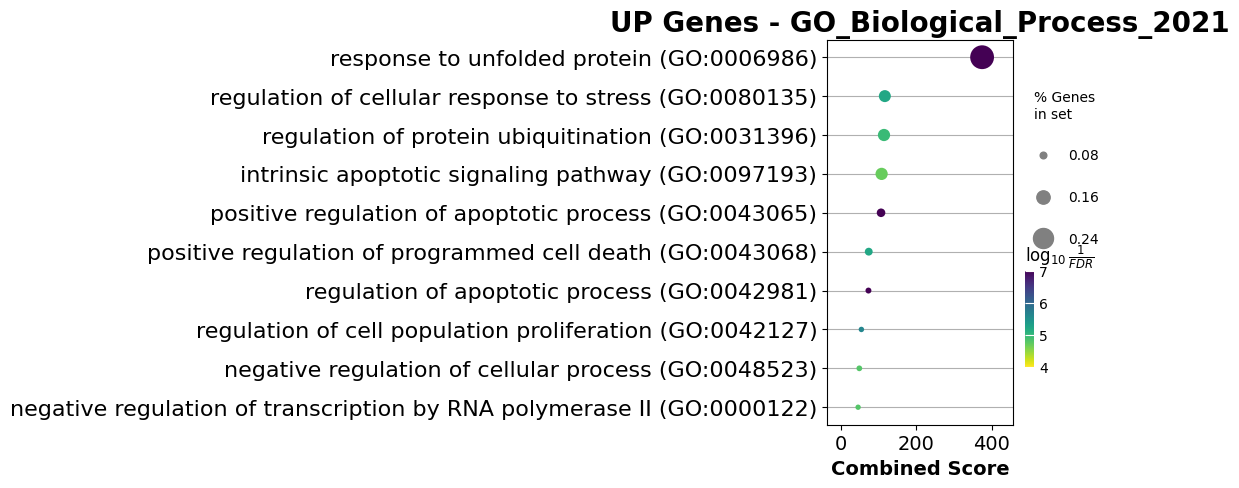

In [ ]:
dotplot(enr_up.res2d, title='UP Genes - GO_Biological_Process_2021',cmap='viridis_r', size=10, figsize=(3,5))

In [ ]:
# Down-regulated genes, cis vs untrt
enr_down = gp.enrichr(gene_list=gene_names_down,
                 gene_sets=['GO_Biological_Process_2021'],
                 organism='mouse',
                 outdir=None,
                )
enr_res_down = enr_down.results

enr_res_down.loc[enr_res_down['Adjusted P-value'] < .05]

Gene_set  \
0   GO_Biological_Process_2021   
1   GO_Biological_Process_2021   
2   GO_Biological_Process_2021   
3   GO_Biological_Process_2021   
4   GO_Biological_Process_2021   
5   GO_Biological_Process_2021   
6   GO_Biological_Process_2021   
7   GO_Biological_Process_2021   
8   GO_Biological_Process_2021   
9   GO_Biological_Process_2021   
10  GO_Biological_Process_2021   
11  GO_Biological_Process_2021   
12  GO_Biological_Process_2021   
13  GO_Biological_Process_2021   
14  GO_Biological_Process_2021   
15  GO_Biological_Process_2021   
16  GO_Biological_Process_2021   
17  GO_Biological_Process_2021   
18  GO_Biological_Process_2021   
19  GO_Biological_Process_2021   
20  GO_Biological_Process_2021   
21  GO_Biological_Process_2021   
22  GO_Biological_Process_2021   
23  GO_Biological_Process_2021   
24  GO_Biological_Process_2021   
25  GO_Biological_Process_2021   
26  GO_Biological_Process_2021   
27  GO_Biological_Process_2021   
28  GO_Biological_Process_2021   
29  GO_Biological_Process_2021   
30  GO_Biological_Process_2021   
31  GO_Biological_Process_2021   
32  GO_Biological_Process_2021   
33  GO_Biological_Process_2021   
34  GO_Biological_Process_2021   
35  GO_Biological_Process_2021   
36  GO_Biological_Process_2021   

                                                 Term   Overlap       P-value  \
0                protein phosphorylation (GO:0006468)    40/496  1.485191e-07   
1   regulation of intracellular signal transductio...    36/437  3.762979e-07   
2   positive regulation of transcription, DNA-temp...   70/1183  9.596759e-07   
3   positive regulation of nucleic acid-templated ...    38/511  2.217605e-06   
4   positive regulation of transcription by RNA po...    56/908  3.700597e-06   
5   positive regulation of developmental process (...    19/177  5.516672e-06   
6                    filopodium assembly (GO:0046847)      6/16  7.103069e-06   
7                        phosphorylation (GO:0016310)    31/400  8.427616e-06   
8   transcription initiation from RNA polymerase I...    16/140  1.362080e-05   
9   regulation of small GTPase mediated signal tra...    16/141  1.490897e-05   
10   regulation of embryonic development (GO:0045995)      8/36  1.647565e-05   
11          regulation of cell migration (GO:0030334)    30/408  3.190813e-05   
12  plasma membrane bounded cell projection assemb...    23/278  4.456714e-05   
13  regulation of transcription, DNA-templated (GO...  106/2244  5.208554e-05   
14    transcription by RNA polymerase II (GO:0006366)    25/320  5.433523e-05   
15           protein autophosphorylation (GO:0046777)    16/159  6.582621e-05   
16  regulation of plasma membrane bounded cell pro...     10/70  8.602556e-05   
17  positive regulation of cell projection organiz...    13/117  1.151353e-04   
18  positive regulation of lipid metabolic process...      6/25  1.222562e-04   
19    positive regulation of JNK cascade (GO:0046330)     10/73  1.234388e-04   
20  DNA-templated transcription, initiation (GO:00...    16/168  1.266237e-04   
21             regulation of JNK cascade (GO:0046328)    12/105  1.597573e-04   
22  regulation of transcription by RNA polymerase ...  102/2206  1.662453e-04   
23  negative regulation of transcription, DNA-temp...    52/948  1.772982e-04   
24       cellular response to starvation (GO:0009267)    15/158  2.111529e-04   
25  positive regulation of cell migration (GO:0030...    21/269  2.120734e-04   
26  positive regulation of GTPase activity (GO:004...    18/214  2.385072e-04   
27  positive regulation of developmental growth (G...      8/52  2.589616e-04   
28  cellular protein modification process (GO:0006...   54/1025  3.598597e-04   
29         regulation of hippo signaling (GO:0035330)      5/20  3.740733e-04   
30  positive regulation of embryonic development (...      5/20  3.740733e-04   
31                     brain development (GO:0007420)    14/150  4.043654e-04   
32  positive regulation of biosynthetic process (G...   

<Axes: title={'center': 'DOWN Genes - GO_Biological_Process_2021'}, xlabel='Combined Score'>

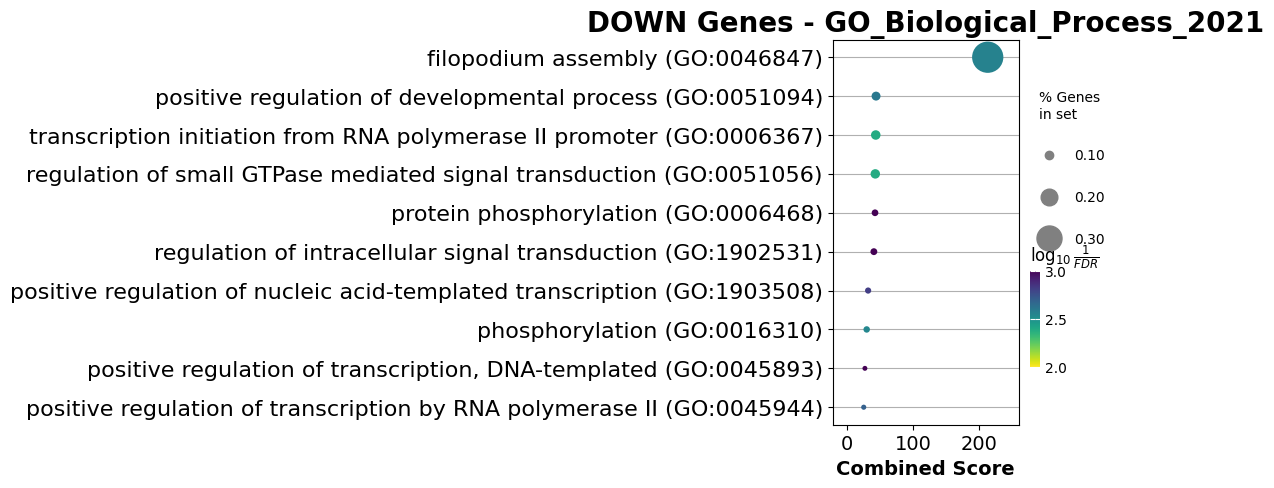

In [ ]:
dotplot(enr_down.res2d, title='DOWN Genes - GO_Biological_Process_2021',cmap='viridis_r', size=10, figsize=(3,5))

**Task11:** You have printed the dataframes of signigicant pathways that are enriched in down- and up-regulated genes, seperately. You have also drawn the dotplots of the major pathways associated with them, coming from the respective dataframes.

Inspect the both results while considering biological relevance to cisplatin treatment. What do you think cisplatin caused?

Cisplatin treatment appears to induce a strong DNA damage response and apoptosis while inhibiting cell proliferation and repair pathways, reflecting its mechanism as a chemotherapy agent that targets rapidly dividing cells by causing irreparable DNA damage.